# ML for Reservation Data & Correlation with Houston Census Figures

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in Census Data

In [2]:
Census_Data = pd.read_csv('Census_ML.csv')

In [3]:
Census_Data.head()

,Unnamed: 0,Race,Sex,Age,Occupation,Year,Male,B
0,0,B,F,26.0,Servant,1900,0,1
1,1,B,M,27.0,Drayman,1900,1,1
2,2,B,F,25.0,Laundress,1900,0,1
3,3,B,F,25.0,Servant,1900,0,1
4,4,B,F,8.0,At School,1900,0,1


In [4]:
Census_Data = Census_Data[['Race','Sex','Age','Occupation','Year','Male','B']]

In [5]:
Census_Data.head()

,Race,Sex,Age,Occupation,Year,Male,B
0,B,F,26.0,Servant,1900,0,1
1,B,M,27.0,Drayman,1900,1,1
2,B,F,25.0,Laundress,1900,0,1
3,B,F,25.0,Servant,1900,0,1
4,B,F,8.0,At School,1900,0,1


In [6]:
Census_Data.shape

(2855, 7)

In [7]:
Census_Data['Age'].unique()

array([26., 27., 25.,  8., 46., 19., 12., 21., 58., 35., 23., 18., 13.,
       56., 20., 39., 24., 51., 15., 17., 14., 60., 22., 54., 48., 10.,
       28., 30., 11., 31., 29.,  9., 50., 49., 63., 33., 34., 32., 37.,
       55., 36., 57., 16., 87., 81., 38., 45., 76., 40., 47., 44., 41.,
       43., 53., 42., 52., 69., 65., 68., 77.,  7.,  6., 80.,  3., 64.,
       70., 62., 67., 61., 59., 75., 73., 66., 78., 74., nan, 82., 79.])

In [8]:
Census_Data.isnull().any()

Race          False
Sex           False
Age            True
Occupation    False
Year          False
Male          False
B             False
dtype: bool

In [9]:
print(Census_Data[Census_Data.isnull().any(axis=1)].head())

     Race Sex  Age             Occupation  Year  Male  B
2598    B   M  NaN  Agent At Real Estate   1920     1  1


In [10]:
Census_Data=Census_Data.dropna()

In [11]:
Census_Data.isnull().any()

Race          False
Sex           False
Age           False
Occupation    False
Year          False
Male          False
B             False
dtype: bool

In [12]:
Census_Data['Age'].unique()

array([26., 27., 25.,  8., 46., 19., 12., 21., 58., 35., 23., 18., 13.,
       56., 20., 39., 24., 51., 15., 17., 14., 60., 22., 54., 48., 10.,
       28., 30., 11., 31., 29.,  9., 50., 49., 63., 33., 34., 32., 37.,
       55., 36., 57., 16., 87., 81., 38., 45., 76., 40., 47., 44., 41.,
       43., 53., 42., 52., 69., 65., 68., 77.,  7.,  6., 80.,  3., 64.,
       70., 62., 67., 61., 59., 75., 73., 66., 78., 74., 82., 79.])

In [13]:
Census_Data.describe()

,Age,Year,Male,B
count,2854.000000,2854.000000,2854.000000,2854.000000
mean,31.414856,1916.047652,0.618781,0.852838
std,12.683491,7.619075,0.485771,0.354329
min,3.000000,1900.000000,0.000000,0.000000
25%,22.000000,1920.000000,0.000000,1.000000
50%,29.000000,1920.000000,1.000000,1.000000
75%,39.000000,1920.000000,1.000000,1.000000
max,87.000000,1920.000000,1.000000,1.000000


In [14]:
Census_Data.head()

,Race,Sex,Age,Occupation,Year,Male,B
0,B,F,26.0,Servant,1900,0,1
1,B,M,27.0,Drayman,1900,1,1
2,B,F,25.0,Laundress,1900,0,1
3,B,F,25.0,Servant,1900,0,1
4,B,F,8.0,At School,1900,0,1


In [15]:
#Census_Basic = Census_Data[['Age','B','Sex','Year']]
Census_Basic = Census_Data[['B','Male','Year','Age']]

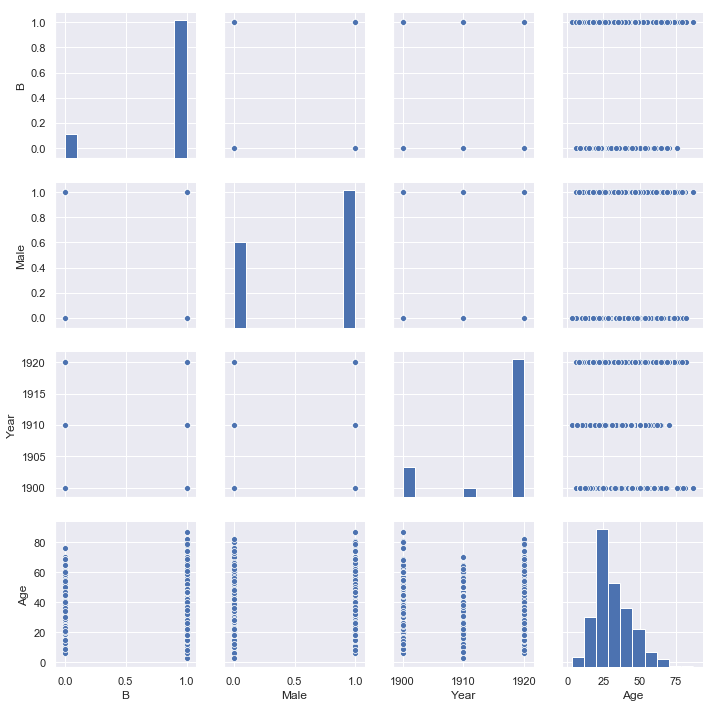

In [16]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(Census_Basic) #, hue='Race', size=2.5);

In [17]:
Census_Basic.B.value_counts()

1    2434
0     420
Name: B, dtype: int64

In [18]:
Chart = Census_Basic.groupby(["Year","B"])['Male'].value_counts()
type(Chart)

pandas.core.series.Series

In [19]:
Chart = Chart.to_frame()

In [20]:
Chart.head(20)

Male
Year B Male      
1900 0 1       29
       0        9
     1 1      259
       0      190
1910 0 1       10
       0        3
     1 1       80
       0       61
1920 0 1      277
       0       92
     1 1     1111
       0      733

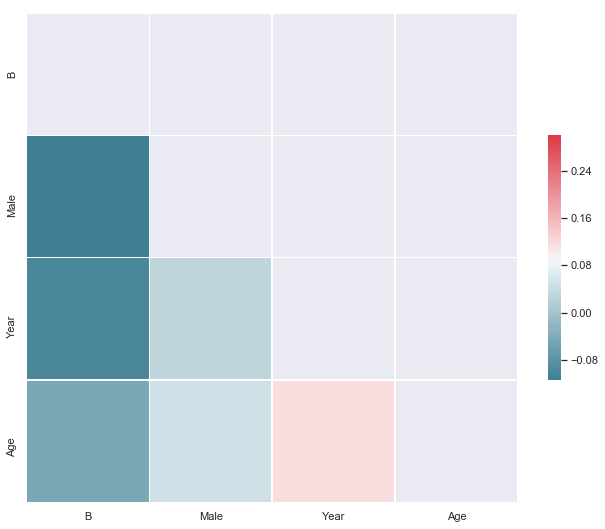

In [21]:
# Compute the correlation matrix
corr = Census_Basic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import fmin_powell
from scipy import integrate

import theano as thno
import theano.tensor as T

In [30]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('B ~ Age + Year', Census_Basic, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(1000, tune=1000, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Year, Age, Intercept]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 4000/4000 [18:21<00:00,  1.60draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.


In [37]:
trace_logistic_model

<MultiTrace: 2 chains, 1000 iterations, 3 variables>

In [44]:
def plot_traces(traces, retain=1000):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = az.plot_trace(traces[-retain:], figsize=(12,len(traces.varnames)*1.5),
        lines={k: v['mean'] for k, v in pm.summary(traces[-retain:]).iterrows()})

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

def create_poly_modelspec(k=1):
    '''
    Convenience function:
    Create a polynomial modelspec string for patsy
    '''
    return ('B ~ Age + Year' + ' '.join(['+ np.power(Age,{})'.format(j)
                                     for j in range(2,k+1)])).strip()

In [45]:
import arviz as az

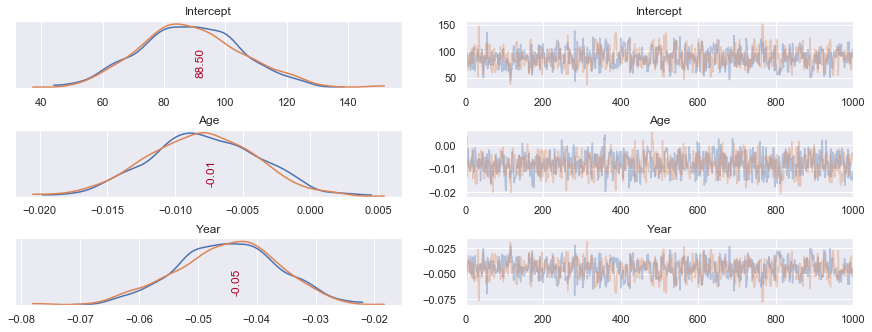

In [46]:
plot_traces(trace_logistic_model, retain=1000)

<Figure size 648x504 with 0 Axes>

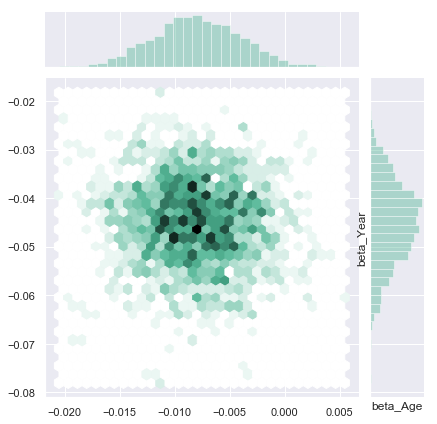

In [49]:
plt.figure(figsize=(9,7))
trace = trace_logistic_model[1:]
sns.jointplot(trace['Age'], trace['Year'], kind="hex", color="#4CB391")
plt.xlabel("beta_Age")
plt.ylabel("beta_Year")
plt.show()

In [54]:
# Linear model with Year == 1900
lm = lambda x, samples: 1 / (1 + np.exp(-(samples['Intercept'] +
                                          samples['Age']*x +
                                          samples['Year']*1900)))

# Linear model with Year == 1910
lm2 = lambda x, samples: 1 / (1 + np.exp(-(samples['Intercept'] +
                                          samples['Age']*x +
                                          samples['Year']*1910)))

# Linear model with Year == 1920
lm3 = lambda x, samples: 1 / (1 + np.exp(-(samples['Intercept'] +
                                          samples['Age']*x +
                                          samples['Year']*1920)))

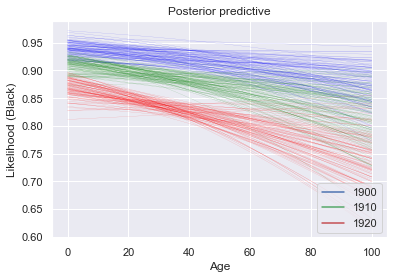

In [60]:
# Plot the posterior predictive distributions of P(B) vs. age
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0, 100, 1000), lm=lm, samples=100, color="blue", alpha=.35)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0, 100, 1000), lm=lm2, samples=100, color="green", alpha=.35)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(0, 100, 1000), lm=lm3, samples=100, color="red", alpha=.35)
import matplotlib.lines as mlines
blue_line = mlines.Line2D(['lm'], [], color='b', label='1900')
green_line = mlines.Line2D(['lm2'], [], color='g', label='1910')
red_line = mlines.Line2D(['lm3'], [], color='r', label='1920')
plt.legend(handles=[blue_line, green_line, red_line], loc='lower right')
plt.ylabel("Likelihood (Black)")
plt.xlabel("Age")
plt.show()

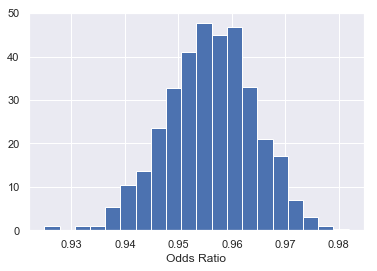

In [58]:
b = trace['Year']
plt.hist(np.exp(b), bins=20, normed=True)
plt.xlabel("Odds Ratio")
plt.show()

In [59]:
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)

print("P(%.3f < O.R. < %.3f) = 0.95"%(np.exp(3*lb),np.exp(3*ub)))

P(0.829 < O.R. < 0.916) = 0.95


## Preview of 1900 - 1920 Census Data

In [7]:
df_1900['Year'] = 1900
df_1910['Year'] = 1910
df_1920['Year'] = 1920
df_1900_rsac = df_1900[["Race","Sex","Age","Occupation","Year","Own or Rent","Free or Mortgage"]]
df_1910_rsac = df_1910[["Race","Sex","Age","Occupation","Year","Own or Rent","Free or Mortgage"]]
df_1920_rsac = df_1920[["Race","Sex","Age","Occupation","Year","Own or Rent","Free or Mortgage"]]

In [8]:
df_1900_rsac.head(3)

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN


## Preview of 1910 Census Data

In [9]:
df_1910_rsac.head(3)

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,W,F,27.0,none,1910,Rent,NaN
1,W,F,23.0,none,1910,NaN,NaN
2,W,F,15.0,none,1910,NaN,NaN


## Preview of 1920 Census Data

In [10]:
df_1920_rsac.head(3)

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,W,M,32.0,Blacksmith At Shops,1920,NaN,NaN
1,W,F,27.0,Dress Maker At Home,1920,NaN,NaN
2,W,M,9.0,None,1920,NaN,NaN


## Concat the 1900 - 1920 Census dataframes together

In [11]:
Census_Data = pd.concat([df_1900_rsac, df_1910_rsac,df_1920_rsac])

In [12]:
Census_Data.head(10)

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN
5,B,M,46.0,Day Laborer,1900,Rent,NaN
6,B,F,34.0,NaN,1900,NaN,NaN
7,B,M,19.0,Drayman,1900,NaN,NaN
8,B,F,15.0,NaN,1900,NaN,NaN
9,B,M,12.0,At School,1900,NaN,NaN


In [13]:
#Census_Data['Race'].unique()
# Replace 'Mu', 'M', 'M/W', 'My' with race = B
Census_Data["Race"].replace(['Mu', 'M', 'M/W', 'My'], "B", inplace=True)

In [14]:
Census_Data['Own or Rent'].unique()

array([nan, 'Rent', 'Own', 'Rent ', 'Owned', 'Owned '], dtype=object)

In [15]:
Census_Data['Own or Rent'].replace(['Rent '], "Rent", inplace=True)
Census_Data['Own or Rent'].replace(['Owned ','Owned'], "Own", inplace=True)

In [16]:
# Select the rows of Census_Data where age is not NaN and sex is not NaN
Census_Data_Age_Year = Census_Data[Census_Data['Age'].notnull() & Census_Data['Year'].notnull()]

In [17]:
Census_Data_Age_Year.head()

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN


In [18]:
Census_Data_Age_Year['Race'].unique()

array(['B', 'W', 'Ot', 'Jp'], dtype=object)

In [19]:
Census_Data_Age_Year['Own or Rent'].unique()

array([nan, 'Rent', 'Own'], dtype=object)

## Black Population by Age Distribution

In [20]:
Census_Black_Age = Census_Data_Age_Year.loc[Census_Data_Age_Year['Race'] == 'B']
Census_Black_Age.head()

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


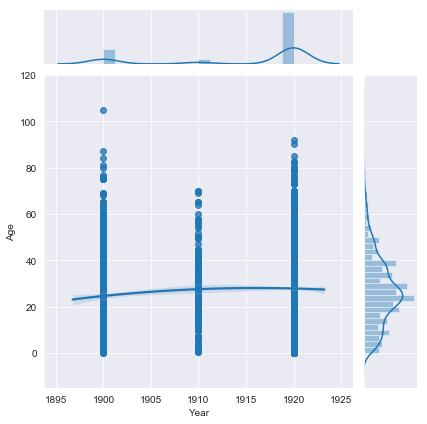

In [21]:
sns.set_style('darkgrid')
g = sns.JointGrid(x="Year", y="Age", data=Census_Black_Age)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.distplot)
#plt.title('Age Distribution of Black Population')

## Black Population by Age-Group

In [22]:
age_ranges= [0,11,19,40,65,110]
age_labels = ['Child(0-11)','12-19','20-40','40-65','Above 65']
Census_Black_Age['Age Group'] = pd.cut(Census_Black_Age['Age'], bins=age_ranges, labels=age_labels)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
Census_Black_Age.head()

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage,Age Group
0,B,F,26.0,Servant,1900,NaN,NaN,20-40
1,B,M,27.0,Drayman,1900,NaN,NaN,20-40
2,B,F,25.0,Laundress,1900,Rent,NaN,20-40
3,B,F,25.0,Servant,1900,NaN,NaN,20-40
4,B,F,8.0,At School,1900,NaN,NaN,Child(0-11)


Text(0.5, 1.0, 'Black Population by Age Group')

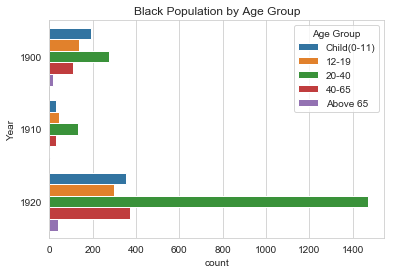

In [24]:
sns.set_style('whitegrid')
sns.countplot(y = "Year", hue="Age Group", data = Census_Black_Age)
plt.title('Black Population by Age Group')

## Black Population by Gender

Text(0.5, 1.0, 'Black Population Growth by Gender')

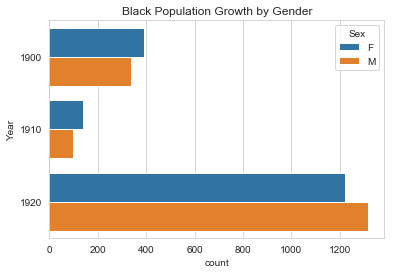

In [25]:
sns.set_style('whitegrid')
sns.countplot(y = "Year", hue="Sex", data = Census_Black_Age)
plt.title('Black Population Growth by Gender')

## Black Population Homeownership or Renting

Text(0.5, 1.0, 'Black Population Homeownership or Renting')

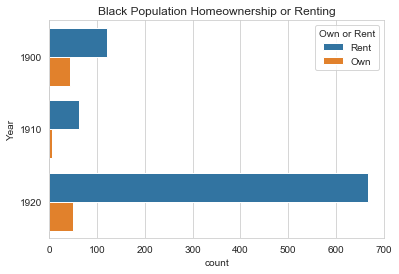

In [26]:
sns.set_style('whitegrid')
sns.countplot(y = "Year", hue="Own or Rent", data = Census_Black_Age)
plt.title('Black Population Homeownership or Renting')

## Homeownership by Race

In [27]:
Census_Own = Census_Data.loc[Census_Data['Own or Rent'] == 'Own']
Census_Own.head()
Census_Own['Race'].unique()
#Census_Data_Home_Ownership = Census_Own[Census_Own['Own or Rent'].notnull() & Census_Data['Race'].notnull()]

array(['B', 'W'], dtype=object)

Text(0.5, 1.0, 'Homeownership by Race: 1900-1920')

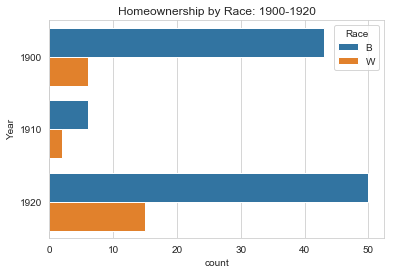

In [28]:
sns.set_style('whitegrid')
sns.countplot(y = "Year", hue="Race", data = Census_Own)
plt.title('Homeownership by Race: 1900-1920')


## Population Growth by Race

In [29]:
# Select the rows of Census_Data where age is not NaN and sex is not NaN
Census_Data_Pop = Census_Data[Census_Data['Race'].notnull() & Census_Data['Year'].notnull()]

In [30]:
grouped_by_year = Census_Data_Pop.groupby(['Race','Year']).count().reset_index()
grouped_by_year['Year'] = grouped_by_year['Year'].astype(int)

grouped_by_year = grouped_by_year[grouped_by_year.Race != 'Jp']
grouped_by_year = grouped_by_year[grouped_by_year.Race != 'Ot']

grouped_by_year.rename(columns={'Sex':'Population'}, 
                 inplace=True)

grouped_by_year

,Race,Year,Population,Age,Occupation,Own or Rent,Free or Mortgage
0,B,1900,730,729,449,164,43
1,B,1910,239,238,239,68,0
2,B,1920,2540,2538,2535,719,45
5,W,1900,78,78,38,16,6
6,W,1910,57,57,57,13,1
7,W,1920,739,738,737,185,14


Text(0.5, 0, 'Year')

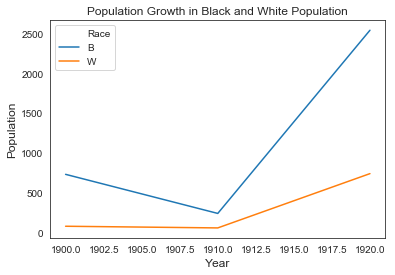

In [31]:
sns.set_style('white',{'axes.grid' : False})
ax = sns.lineplot(x="Year", y='Population',hue="Race",data=grouped_by_year)
plt.title('Population Growth in Black and White Population')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)



Text(0.5, 1.0, 'Race Population Growth Between 1900-1920')

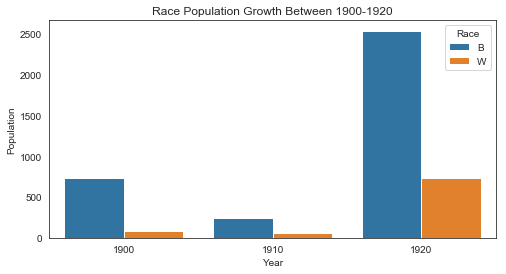

In [32]:
ax = sns.barplot(x='Year', y='Population', hue='Race', 
                 data=grouped_by_year)
ax.figure.set_size_inches(8,4)
plt.title('Race Population Growth Between 1900-1920')


In [33]:
# #s_plot = pd.dataframe(Census_Data[Census_Data.Race != 'Jp'])
# #s_plot = pd.dataframe([Census_Data.Race != 'Ot'])
# s_plot = Census_Data[Census_Data['Race'] != 'Jp']
# s_plot = s_plot[s_plot['Race'] != 'Ot']
# #s_plot = Census_Data[Census_Data['Race'] != 'nan']
# s_plot.Race.unique()

# sns.set_style('white',{'axes.grid' : False})
# ax = sns.swarmplot(x='Year', y='Age', data=s_plot, 
#               hue='Race',palette="dark",dodge=True)
# ax.figure.set_size_inches(15,14)
grouped_by_year.Race.unique()

array(['B', 'W'], dtype=object)

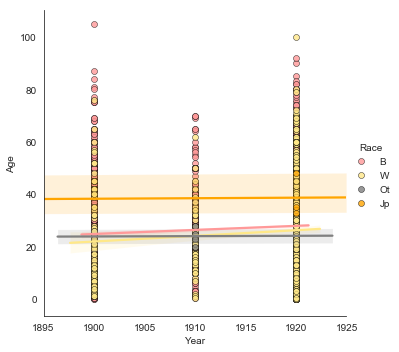

In [34]:
lp = sns.lmplot(data= Census_Data,
                x='Year', y='Age',hue='Race',
                palette={"B": "#FF9999", "W": "#FFE888", "Ot" : "grey", "Jp" : "orange"},
                fit_reg=True,
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

#x="Year", y="Age", data=Census_Black_Age

## Occupations of Black Population by Race

In [35]:
Census_Data['Occupation'].unique()

array(['Servant', 'Drayman', 'Laundress', ..., 'Dish Washer At Cafe',
       'Switchman At Railway Co', 'Mover At Moving Co'], dtype=object)

In [36]:
# Select the rows of Census_Data where age is not NaN and sex is not NaN
Census_Data_Occ = Census_Data[Census_Data['Occupation'].notnull() & Census_Data['Year'].notnull()]

In [37]:
#Census_Data_Occ = Census_Data
Census_Data_Occ = Census_Data_Occ[Census_Data_Occ.Occupation != 'None']
Census_Data_Occ = Census_Data_Occ[Census_Data_Occ.Occupation != 'none']
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Laborer')] = 'Laborer'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Laundress')] = 'Laundress'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Cook')] = 'Cook'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Porter')] = 'Porter'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Washwoman')] = 'Washwoman'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Maid')] = 'Maid'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Porter')] = 'Porter'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Seamstress')] = 'Seamstress'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Janitor')] = 'Janitor'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Servant')] = 'Servant'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Maid')] = 'Maid'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Wait')] = 'Waitress'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Owner')] = 'Owner of Business'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Clean')] = 'Cleaner'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Manager')] = 'Manager'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Nurse')] = 'Nurse'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('Presser')] = 'Presser'

Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('river')] = 'Driver'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('lerk')] = 'Clerk'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('ffe')] = 'Chauffeur'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('pent')] = 'Carpenter'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('lean')] = 'Cleaner'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('lerk')] = 'Clerk'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('rick')] = 'Bricklayer'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('arber')] = 'Barber'
Census_Data_Occ['Occupation'][Census_Data_Occ.Occupation.str.contains('elper')] = 'Assistant'




Census_Data_Occ['Occupation'].value_counts()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\user\appdata\local\programs\python\pyth

Laborer                                         520
Cook                                            209
Laundress                                       188
Washwoman                                       149
Porter                                          134
At School                                       121
Driver                                          105
Maid                                             89
Owner of Business                                72
Waitress                                         66
Seamstress                                       48
Chauffeur                                        47
Carpenter                                        39
Nurse                                            36
Assistant                                        34
Clerk                                            34
Cleaner                                          31
Servant                                          28
Barber                                           24
Manager     

In [38]:
pd.set_option('display.max_rows',10)
Census_Data_Occ.groupby(['Sex','Occupation'])['Occupation'].agg('count').head(10)

Sex  Occupation                        
F    ?                                      2
     Abstracter At Loan And Investments     1
     Actress At Theatrical Company          1
     Assistant                              4
     Assorter At Paper Factory              1
     At School                             58
     Barber                                 3
     Beauty Culture At Beauty Parlor        1
     Beauty Culture At Homes                1
     Beauty Culturist At Parlor             1
Name: Occupation, dtype: int64

In [39]:
Census_Data_Occ

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN
...,...,...,...,...,...,...,...
3276,B,M,37.0,Plumbers Help At Construction Co,1920,NaN,NaN
3277,B,F,18.0,Laundry Worker At Laundry,1920,NaN,NaN
3278,B,F,22.0,Dish Washer At Cafe,1920,NaN,NaN
3280,B,M,47.0,Switchman At Railway Co,1920,NaN,NaN


In [40]:
Census_Data_Occ_F = Census_Data_Occ.loc[Census_Data_Occ['Sex'] == 'F']
Census_Data_Occ_F = Census_Data_Occ_F.loc[Census_Data_Occ_F['Race'] == 'B']

In [41]:
Census_Data_Occ_F

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN
17,B,F,58.0,Laundress,1900,Rent,NaN
...,...,...,...,...,...,...,...
3265,B,F,28.0,Cook,1920,NaN,NaN
3270,B,F,21.0,Cook,1920,NaN,NaN
3274,B,F,19.0,Cook,1920,NaN,NaN
3277,B,F,18.0,Laundry Worker At Laundry,1920,NaN,NaN


In [42]:
# occ_count_F  = Census_Data_Occ_F['Occupation'].value_counts()
# occ_count_F = occ_count_F[:15,]
# ax = sns.barplot(occ_count_F.index, occ_count_F.values, alpha=0.8)
# ax.figure.set_size_inches(15, 5)
# plt.title('Top 10 Occupations in 1910 Census')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Occupation', fontsize=12)
# plt.xticks(rotation='45')
# plt.show()

In [43]:
Chart_F_Occ = Census_Data_Occ_F.groupby("Year")['Occupation'].value_counts().groupby(level=0).head(5)
Chart_F_Occ

Year  Occupation
1900  Laundress      77
      At School      52
      Servant        24
      Cook           17
      Nurse           7
                   ... 
1920  Washwoman     139
      Cook          122
      Maid           83
      Laundress      79
      Seamstress     33
Name: Occupation, Length: 15, dtype: int64

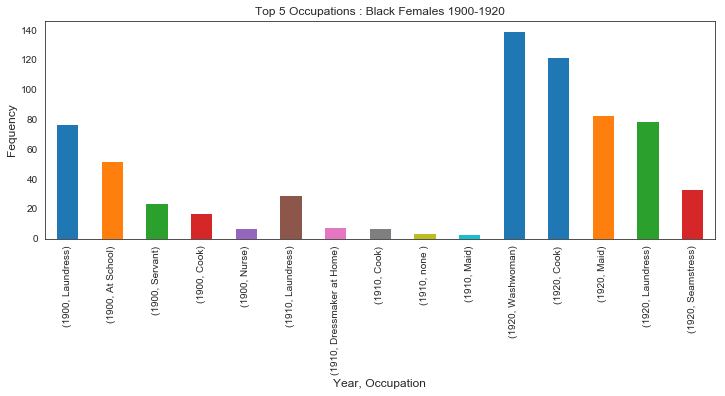

In [44]:
#df.set_index('Date', inplace=True)
#df.groupby('ticker')['adj_close'].plot(legend=True)
Chart_F_Occ.plot(kind='bar',figsize=(12,4))
plt.title('Top 5 Occupations : Black Females 1900-1920')
plt.ylabel('Fequency', fontsize=12)
plt.xlabel('Year, Occupation', fontsize=12)
#plt.xticks(rotation='45')
plt.show()

In [45]:
Census_Data_Occ_M = Census_Data_Occ.loc[Census_Data_Occ['Sex'] == 'M']
Census_Data_Occ_M = Census_Data_Occ_M.loc[Census_Data_Occ_M['Race'] == 'B']

In [46]:
Chart_M_Occ = Census_Data_Occ_M.groupby("Year")['Occupation'].value_counts().groupby(level=0).head(5)
Chart_M_Occ

Year  Occupation
1900  Laborer        86
      At School      56
      Drayman        18
      Porter         11
      Coachman       10
                   ... 
1920  Laborer       339
      Porter        116
      Driver         86
      Cook           46
      Chauffeur      43
Name: Occupation, Length: 15, dtype: int64

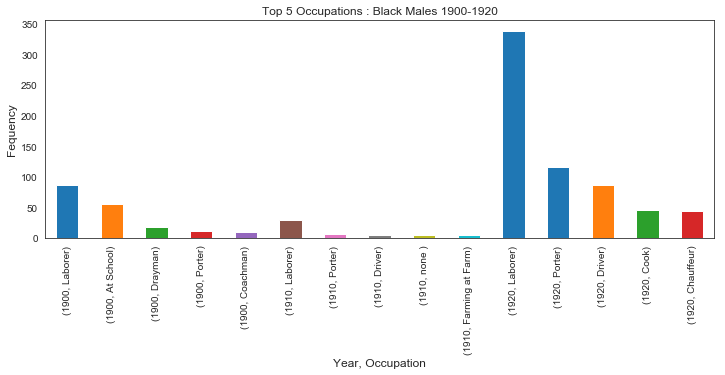

In [47]:
Chart_M_Occ.plot(kind='bar',figsize=(12,4))
plt.title('Top 5 Occupations : Black Males 1900-1920')
plt.ylabel('Fequency', fontsize=12)
plt.xlabel('Year, Occupation', fontsize=12)
#plt.xticks(rotation='45')
plt.show()

In [48]:
Census_Data_Occ

,Race,Sex,Age,Occupation,Year,Own or Rent,Free or Mortgage
0,B,F,26.0,Servant,1900,NaN,NaN
1,B,M,27.0,Drayman,1900,NaN,NaN
2,B,F,25.0,Laundress,1900,Rent,NaN
3,B,F,25.0,Servant,1900,NaN,NaN
4,B,F,8.0,At School,1900,NaN,NaN
...,...,...,...,...,...,...,...
3276,B,M,37.0,Plumbers Help At Construction Co,1920,NaN,NaN
3277,B,F,18.0,Laundry Worker At Laundry,1920,NaN,NaN
3278,B,F,22.0,Dish Washer At Cafe,1920,NaN,NaN
3280,B,M,47.0,Switchman At Railway Co,1920,NaN,NaN


In [94]:
Census_Data_Occ['Race'].unique()

array(['B', 'W', nan, 'Jp'], dtype=object)

In [95]:
Census_Data_Occ['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [96]:
Census_Data_Occ['Year'].unique()

array([1900, 1910, 1920], dtype=int64)

In [97]:
Census_ML = Census_Data_Occ[['Race','Sex','Age','Occupation','Year']]

In [98]:
Census_ML.head(5)

,Race,Sex,Age,Occupation,Year
0,B,F,26.0,Servant,1900
1,B,M,27.0,Drayman,1900
2,B,F,25.0,Laundress,1900
3,B,F,25.0,Servant,1900
4,B,F,8.0,At School,1900


In [99]:
Census_ML.Age.dtype

dtype('float64')

In [100]:
Census_ML['Male'] = Census_ML['Sex'].map( {'M':1, 'F':0} )
Census_ML[['Sex', 'Male']]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sex,Male
0,F,0.0
1,M,1.0
2,F,0.0
3,F,0.0
4,F,0.0
...,...,...
3276,M,1.0
3277,F,0.0
3278,F,0.0
3280,M,1.0


In [101]:
Census_ML.head(5)

,Race,Sex,Age,Occupation,Year,Male
0,B,F,26.0,Servant,1900,0.0
1,B,M,27.0,Drayman,1900,1.0
2,B,F,25.0,Laundress,1900,0.0
3,B,F,25.0,Servant,1900,0.0
4,B,F,8.0,At School,1900,0.0


In [102]:
Census_ML['Race'].value_counts()

B     2435
W      420
Jp       3
Name: Race, dtype: int64

In [105]:
Census_ML = Census_ML[Census_ML.Race != 'Jp']

In [106]:
Census_ML['Race'].value_counts()

B    2435
W     420
Name: Race, dtype: int64

In [108]:
Census_ML['B'] = Census_ML['Race'].map( {'B':1, 'W':0} )
Census_ML.head(5).tail(5)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Race,Sex,Age,Occupation,Year,Male,B
0,B,F,26.0,Servant,1900,0.0,1.0
1,B,M,27.0,Drayman,1900,1.0,1.0
2,B,F,25.0,Laundress,1900,0.0,1.0
3,B,F,25.0,Servant,1900,0.0,1.0
4,B,F,8.0,At School,1900,0.0,1.0


In [109]:
Census_ML.describe()

,Age,Year,Male,B
count,2854.000000,2928.000000,2855.000000,2855.000000
mean,31.414856,1915.898224,0.618914,0.852890
std,12.683491,7.581415,0.485739,0.354278
min,3.000000,1900.000000,0.000000,0.000000
25%,22.000000,1920.000000,0.000000,1.000000
50%,29.000000,1920.000000,1.000000,1.000000
75%,39.000000,1920.000000,1.000000,1.000000
max,87.000000,1920.000000,1.000000,1.000000


In [113]:
Census_ML.dropna()

,Race,Sex,Age,Occupation,Year,Male,B
0,B,F,26.0,Servant,1900,0.0,1.0
1,B,M,27.0,Drayman,1900,1.0,1.0
2,B,F,25.0,Laundress,1900,0.0,1.0
3,B,F,25.0,Servant,1900,0.0,1.0
4,B,F,8.0,At School,1900,0.0,1.0
...,...,...,...,...,...,...,...
3276,B,M,37.0,Plumbers Help At Construction Co,1920,1.0,1.0
3277,B,F,18.0,Laundry Worker At Laundry,1920,0.0,1.0
3278,B,F,22.0,Dish Washer At Cafe,1920,0.0,1.0
3280,B,M,47.0,Switchman At Railway Co,1920,1.0,1.0


In [114]:
Census_ML.describe()

,Age,Year,Male,B
count,2854.000000,2928.000000,2855.000000,2855.000000
mean,31.414856,1915.898224,0.618914,0.852890
std,12.683491,7.581415,0.485739,0.354278
min,3.000000,1900.000000,0.000000,0.000000
25%,22.000000,1920.000000,0.000000,1.000000
50%,29.000000,1920.000000,1.000000,1.000000
75%,39.000000,1920.000000,1.000000,1.000000
max,87.000000,1920.000000,1.000000,1.000000


In [115]:
Census_ML.shape

(2928, 7)

In [128]:
Census_ML['Age'].count()

2854

In [129]:
Census_ML['Year'].count()

2928

In [133]:
Census_ML['Male'].unique()

array([ 0.,  1., nan])

In [134]:
Census_ML['B'].count()

2855

In [120]:
Census_ML['Age'].unique()

array([26., 27., 25.,  8., 46., 19., 12., 21., 58., 35., 23., 18., 13.,
       56., 20., 39., 24., 51., 15., 17., 14., 60., 22., 54., 48., 10.,
       28., 30., 11., 31., 29.,  9., 50., 49., 63., 33., 34., 32., 37.,
       55., 36., 57., 16., 87., 81., 38., 45., 76., 40., 47., 44., 41.,
       43., 53., 42., 52., 69., 65., 68., 77.,  7.,  6., 80.,  3., 64.,
       70., 62., nan, 67., 61., 59., 75., 73., 66., 78., 74., 82., 79.])

In [121]:
Census_ML.Age.dropna()

0       26.0
1       27.0
2       25.0
3       25.0
4        8.0
        ... 
3276    37.0
3277    18.0
3278    22.0
3280    47.0
3281    35.0
Name: Age, Length: 2854, dtype: float64

In [122]:
Census_ML['Age'].unique()

array([26., 27., 25.,  8., 46., 19., 12., 21., 58., 35., 23., 18., 13.,
       56., 20., 39., 24., 51., 15., 17., 14., 60., 22., 54., 48., 10.,
       28., 30., 11., 31., 29.,  9., 50., 49., 63., 33., 34., 32., 37.,
       55., 36., 57., 16., 87., 81., 38., 45., 76., 40., 47., 44., 41.,
       43., 53., 42., 52., 69., 65., 68., 77.,  7.,  6., 80.,  3., 64.,
       70., 62., nan, 67., 61., 59., 75., 73., 66., 78., 74., 82., 79.])

In [127]:
Census_ML[Census_ML.values  == 8]

,Race,Sex,Age,Occupation,Year,Male,B
4,B,F,8.0,At School,1900,0.0,1.0
99,B,M,8.0,At School,1900,1.0,1.0
116,B,F,8.0,At School,1900,0.0,1.0
128,B,M,8.0,At School,1900,1.0,1.0
187,B,M,8.0,At School,1900,1.0,1.0
...,...,...,...,...,...,...,...
455,B,M,8.0,At School,1900,1.0,1.0
469,B,M,8.0,At School,1900,1.0,1.0
516,W,F,8.0,At School,1900,0.0,0.0
567,B,M,8.0,At School,1900,1.0,1.0


In [137]:
Census_ML.to_csv('Census_ML.csv')

In [49]:
Houston.head(10)
Houston = Houston.sort_values(by='Year', ascending=True)
Houston.head(15)

,Year,Total Population Houston,Percent,White,Percent.1,Black,Percent.2,Other,Percent.3
14,1850,2396,100,1863,77.754591,533,22.245409,0,0.000000
13,1860,4845,100,3768,77.770898,1077,22.229102,0,0.000000
12,1870,9382,100,5691,60.658708,3691,39.341292,0,0.000000
11,1880,16513,100,10026,60.715800,6479,39.235754,8,0.048447
10,1890,27557,100,17178,62.336249,10370,37.631092,9,0.032660
...,...,...,...,...,...,...,...,...,...
4,1950,596163,100,470503,78.921872,124766,20.928169,894,0.149959
3,1960,938219,100,720547,76.799447,215037,22.919702,2635,0.280851
2,1970,1232802,100,904889,73.401000,316551,25.677359,11362,0.921640
1,1980,1595138,100,978353,61.333439,440346,27.605511,176439,11.061049


Text(0.5, 0, 'Year')

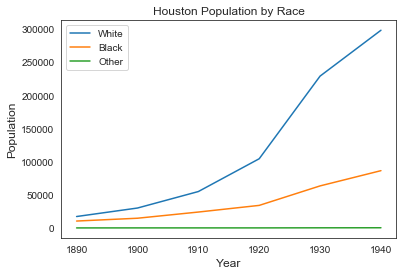

In [50]:
Houston.iloc[4:10].plot(x="Year", y=["White", "Black", "Other"], kind="line")
plt.title('Houston Population by Race')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

Text(0.5, 0, 'Year')

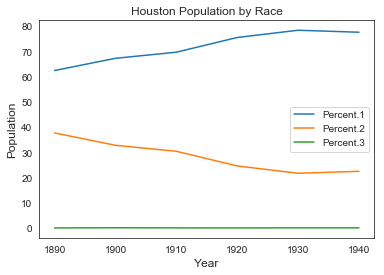

In [51]:
Houston.iloc[4:10].plot(x="Year", y=["Percent.1", "Percent.2", "Percent.3"], kind="line")
plt.title('Houston Population by Race')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

Text(0.5, 0, 'Year')

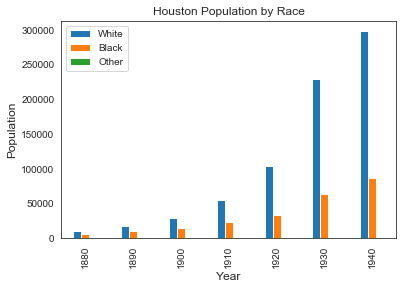

In [52]:
Houston.iloc[3:10][["Year", "White", "Black", "Other"]].plot(x="Year", kind="bar")
plt.title('Houston Population by Race')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

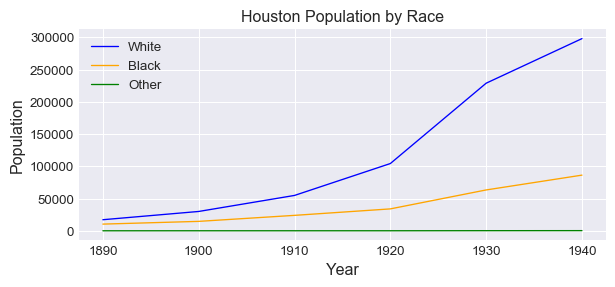

In [53]:
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(680/my_dpi, 280/my_dpi), dpi=my_dpi)
plt.plot(Houston.iloc[4:10]['Year'], Houston.iloc[4:10]['White'], marker='', color='blue', linewidth=1, alpha=1)
plt.plot(Houston.iloc[4:10]['Year'], Houston.iloc[4:10]['Black'], marker='', color='orange', linewidth=1, alpha=1)
plt.plot(Houston.iloc[4:10]['Year'], Houston.iloc[4:10]['Other'], marker='', color='green', linewidth=1, alpha=1)

plt.title('Houston Population by Race')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)
#plt.plot(Houston['Year'], Houston['Black'], marker='', color='orange', linewidth=2, alpha=0.6)
plt.legend()


Text(0.5, 0, 'Year')

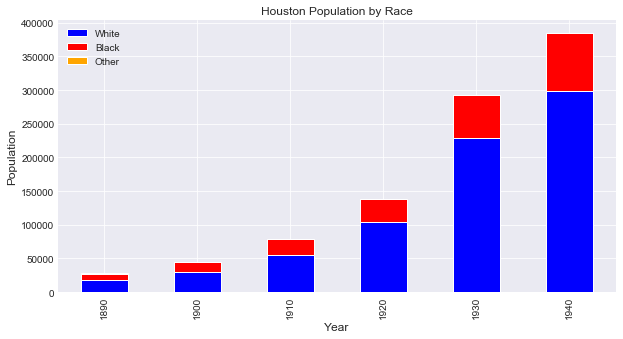

In [54]:
pivot = Houston.set_index('Year')
colors = ["blue", "red","orange"]
pivot.iloc[4:10].loc[:,["White", "Black", "Other"]].plot.bar(stacked=True, color=colors, figsize=(10,5))
plt.title('Houston Population by Race')
plt.ylabel('Population', fontsize=12)
plt.xlabel('Year', fontsize=12)


In [55]:
H_Stats = Houston.iloc[5:8]
H_Stats

,Year,Total Population Houston,Percent,White,Percent.1,Black,Percent.2,Other,Percent.3
9,1900,44633,100,29979,67.167791,14608,32.729147,46,0.103063
8,1910,78800,100,54832,69.583756,23929,30.366751,39,0.049492
7,1920,138276,100,104268,75.405710,33960,24.559576,48,0.034713


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0.5, 0, 'Year')

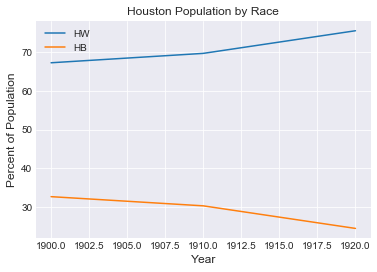

In [56]:
H_Stats.rename(columns = {'Percent.1':'HW', 'Percent.2':'HB'}, inplace = True)
H_Stats.plot(x="Year", y=["HW", "HB"], kind="line")
plt.title('Houston Population by Race')
plt.ylabel('Percent of Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

In [57]:
grouped_by_year = Census_Data_Pop.groupby(['Race','Year']).count().reset_index()
grouped_by_year['Year'] = grouped_by_year['Year'].astype(int)

grouped_by_year = grouped_by_year[grouped_by_year.Race != 'Jp']
grouped_by_year = grouped_by_year[grouped_by_year.Race != 'Ot']

grouped_by_year.rename(columns={'Sex':'Population'}, 
                 inplace=True)

grouped_by_year.head(10)
#

,Race,Year,Population,Age,Occupation,Own or Rent,Free or Mortgage
0,B,1900,730,729,449,164,43
1,B,1910,239,238,239,68,0
2,B,1920,2540,2538,2535,719,45
5,W,1900,78,78,38,16,6
6,W,1910,57,57,57,13,1
7,W,1920,739,738,737,185,14


In [58]:
H_Stats.head(5)

,Year,Total Population Houston,Percent,White,HW,Black,HB,Other,Percent.3
9,1900,44633,100,29979,67.167791,14608,32.729147,46,0.103063
8,1910,78800,100,54832,69.583756,23929,30.366751,39,0.049492
7,1920,138276,100,104268,75.405710,33960,24.559576,48,0.034713


In [59]:
result = pd.crosstab(index=grouped_by_year['Year'], 
                     columns=grouped_by_year['Race'], 
                     values=grouped_by_year['Population'], 
                     aggfunc='sum', 
                     normalize='index')#.applymap('{:.2f}'.format)
result

Race,B,W
Year,,
1900,0.903465,0.096535
1910,0.807432,0.192568
1920,0.774626,0.225374


In [60]:
result['B'].values * 100
result

Race,B,W
Year,,
1900,0.903465,0.096535
1910,0.807432,0.192568
1920,0.774626,0.225374


In [61]:
result['B'] = pd.Series(["{0:.2f}".format(val * 100) for val in result['B']], index = result.index)
#result['W'] = pd.Series(["{0:.2f}".format(val * 100) for val in result['W']], index = result.index)

In [62]:
result

Race,B,W
Year,,
1900,90.35,0.096535
1910,80.74,0.192568
1920,77.46,0.225374


In [63]:
result['W'] = pd.Series(["{0:.2f}".format(val * 100) for val in result['W']], index = result.index)

In [64]:
result

Race,B,W
Year,,
1900,90.35,9.65
1910,80.74,19.26
1920,77.46,22.54


In [65]:
result.rename(columns={'B':'FB','W':'FW'}, 
                 inplace=True)

In [66]:
result

Race,FB,FW
Year,,
1900,90.35,9.65
1910,80.74,19.26
1920,77.46,22.54


In [67]:
Stats = pd.merge(H_Stats, result, how='left', left_on='Year', right_on='Year')

In [68]:
Stats[["FB", "FW"]] = Stats[["FB", "FW"]].apply(pd.to_numeric)
Stats

,Year,Total Population Houston,Percent,White,HW,Black,HB,Other,Percent.3,FB,FW
0,1900,44633,100,29979,67.167791,14608,32.729147,46,0.103063,90.35,9.65
1,1910,78800,100,54832,69.583756,23929,30.366751,39,0.049492,80.74,19.26
2,1920,138276,100,104268,75.405710,33960,24.559576,48,0.034713,77.46,22.54


Text(0.5, 0, 'Year')

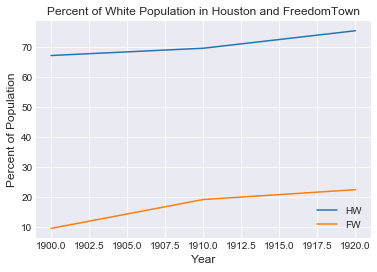

In [69]:
Stats.plot(x="Year", y=['HW','FW'], kind="line")
plt.title('Percent of White Population in Houston and FreedomTown')
plt.ylabel('Percent of Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

Text(0.5, 0, 'Year')

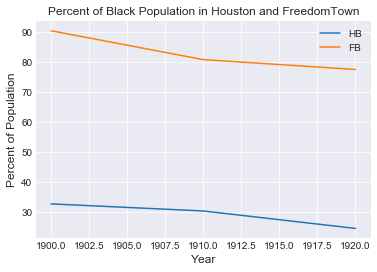

In [70]:
Stats.plot(x="Year", y=['HB','FB'], kind="line")
plt.title('Percent of Black Population in Houston and FreedomTown')
plt.ylabel('Percent of Population', fontsize=12)
plt.xlabel('Year', fontsize=12)

In [71]:
Stats['HW'].corr(Stats['FW'], method= 'pearson')

0.8724535657082837

In [72]:
Stats['HB'].corr(Stats['FB'], method= 'pearson')

0.8702563219749729

In [73]:
Stats
Stats_1 = Stats [['HW','HB','FB','FW']]
Stats_1

,HW,HB,FB,FW
0,67.167791,32.729147,90.35,9.65
1,69.583756,30.366751,80.74,19.26
2,75.405710,24.559576,77.46,22.54


In [74]:
Stats_1.corr()
Stats_1.corr().applymap(lambda x: int(x*100)/100)

,HW,HB,FB,FW
HW,1.00,-0.99,-0.87,0.87
HB,-0.99,1.00,0.87,-0.87
FB,-0.87,0.87,1.00,-1.00
FW,0.87,-0.87,-1.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002175B141160>,
      dtype=object)

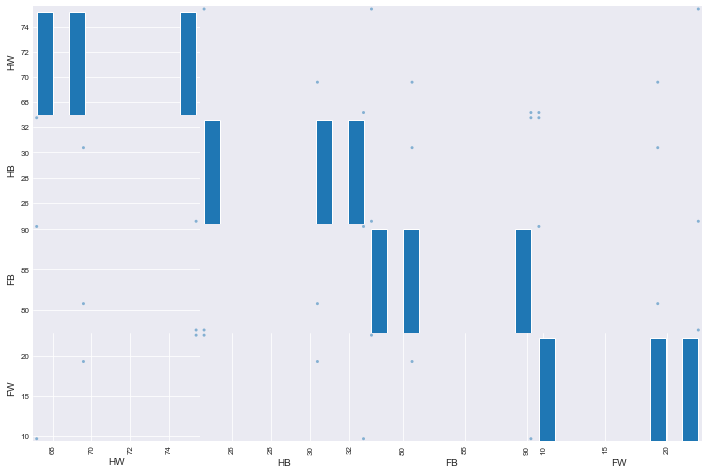

In [75]:
pd.plotting.scatter_matrix(Stats_1, figsize=(12,8),cmap='purples')

# The below is OLD!!!!!!

## Preview of 1900 Census Data - stats

In [76]:
df_1900_rsac.describe()

,Age,Year
count,807.000000,808.0
mean,24.426890,1900.0
std,17.567681,0.0
min,0.100000,1900.0
25%,10.000000,1900.0
50%,21.000000,1900.0
75%,35.000000,1900.0
max,105.000000,1900.0


## Preview of 1910 Census Data - stats

In [77]:
df_1910.describe()

,Line #,House No,Age,Year
count,850.000000,539.000000,299.000000,850.0
mean,46.088235,1037.946197,26.516388,1910.0
std,28.543736,356.702268,13.965342,0.0
min,1.000000,208.000000,0.300000,1910.0
25%,22.000000,820.500000,17.000000,1910.0
50%,43.000000,1108.000000,25.000000,1910.0
75%,70.000000,1309.000000,35.000000,1910.0
max,100.000000,1806.000000,70.000000,1910.0


## Preview of 1920 Census Data - stats

In [78]:
df_1920.describe()

,Line #,Age,Year
count,3282.000000,3279.000000,3282.0
mean,50.275137,27.530817,1920.0
std,28.786366,15.021336,0.0
min,1.000000,0.000000,1920.0
25%,25.000000,18.000000,1920.0
50%,50.000000,26.000000,1920.0
75%,75.000000,36.000000,1920.0
max,100.000000,100.000000,1920.0


## 1900 Census Data - Race by Numbers

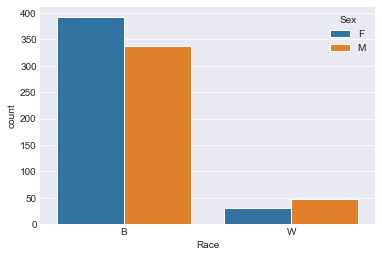

In [79]:
sns.countplot("Race",hue='Sex',data=df_1900)

## 1910 Census Data - Race by Numbers

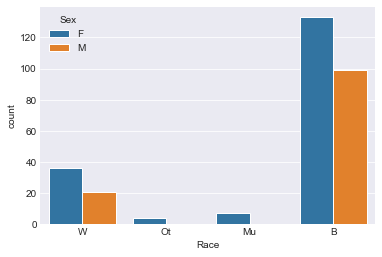

In [80]:
sns.countplot("Race",hue='Sex',data=df_1910)

## 1920 Census Data - Race by Numbers

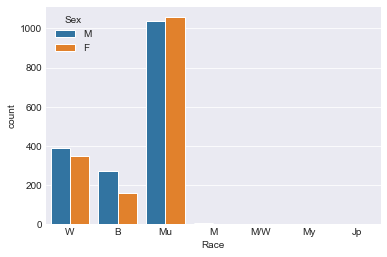

In [81]:
sns.countplot("Race",hue='Sex',data=df_1920)

## Census Data - Race vs Age

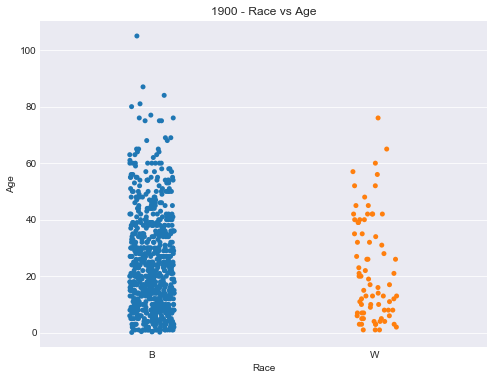

In [82]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(8, 6))  
sns.stripplot(df_1900['Race'], df_1900['Age'], jitter=True, ax=ax)  
ax.set_title('1900 - Race vs Age')  
plt.show()  

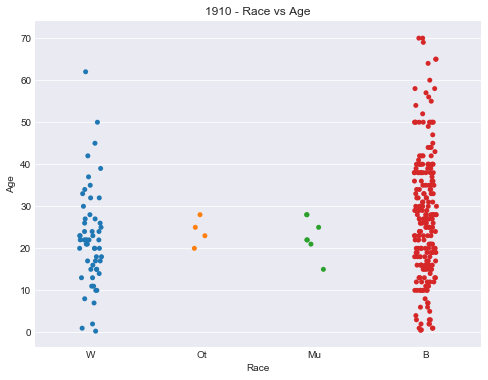

In [83]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(8, 6))  
sns.stripplot(df_1910['Race'], df_1910['Age'], jitter=True, ax=ax)  
ax.set_title('1910 - Race vs Age')  
plt.show()  

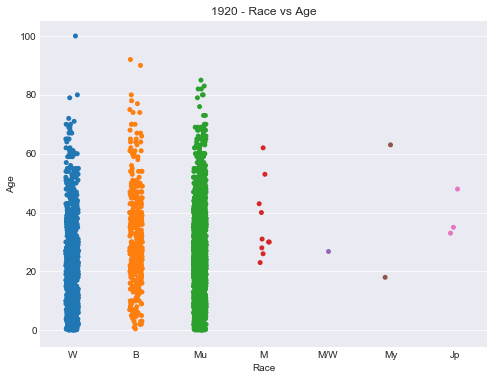

In [84]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(8, 6))  
sns.stripplot(df_1920['Race'], df_1920['Age'], jitter=True, ax=ax)  
ax.set_title('1920 - Race vs Age')  
plt.show()  

## Census Data - Occupation by Numbers

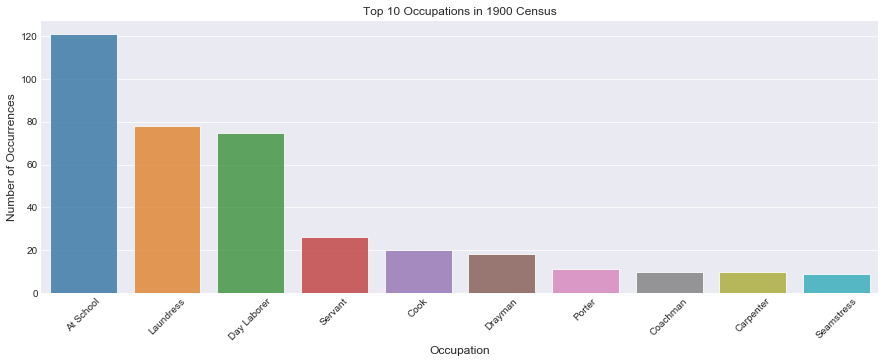

In [85]:
occ_count  = df_1900['Occupation'].value_counts()
occ_count = occ_count[:10,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.8)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1900 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()

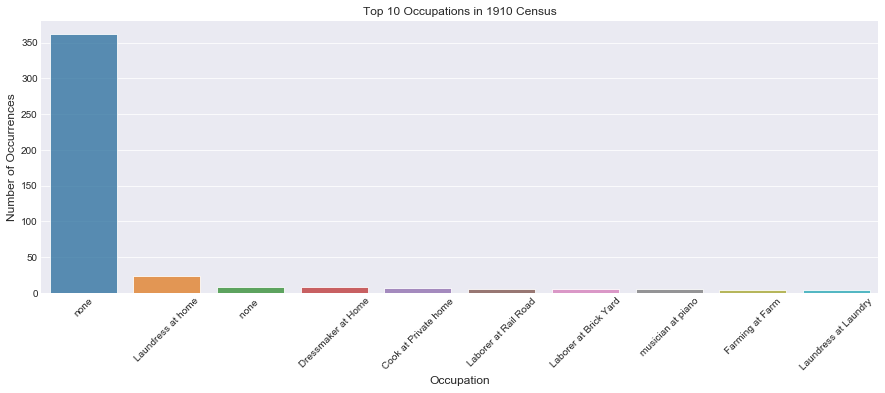

In [86]:
occ_count  = df_1910['Occupation'].value_counts()
occ_count = occ_count[:10,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.8)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1910 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()

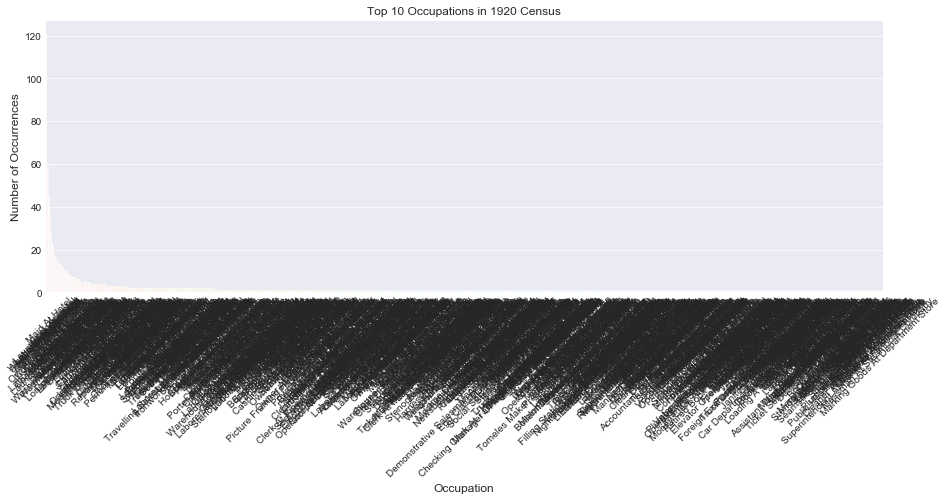

In [87]:
occ_count  = df_1920['Occupation'].value_counts()
occ_count = occ_count[1:,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.8)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1920 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()

## Age Distribution

Race
B    AxesSubplot(0.125,0.125;0.775x0.755)
W    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

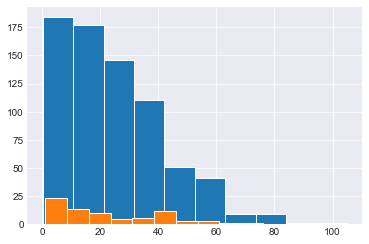

In [88]:
df_1900.groupby('Race').Age.hist()


Race
B    AxesSubplot(0.125,0.125;0.775x0.755)
W    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

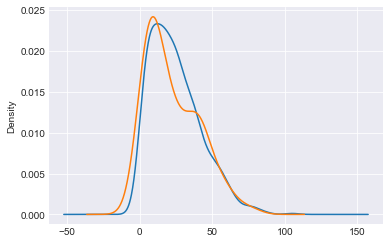

In [89]:
df_1900.groupby('Race').Age.plot(kind='kde')

Race
B     AxesSubplot(0.125,0.125;0.775x0.755)
Mu    AxesSubplot(0.125,0.125;0.775x0.755)
Ot    AxesSubplot(0.125,0.125;0.775x0.755)
W     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

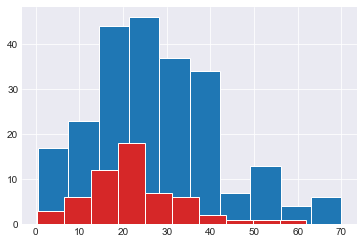

In [90]:
df_1910.groupby('Race').Age.hist()

Race
B     AxesSubplot(0.125,0.125;0.775x0.755)
Mu    AxesSubplot(0.125,0.125;0.775x0.755)
Ot    AxesSubplot(0.125,0.125;0.775x0.755)
W     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

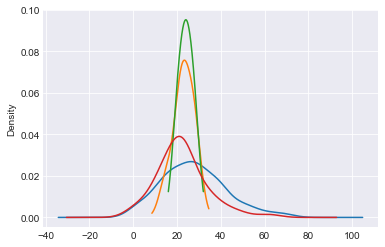

In [91]:
df_1910.groupby('Race').Age.plot(kind='kde')

Race
B      AxesSubplot(0.125,0.125;0.775x0.755)
Jp     AxesSubplot(0.125,0.125;0.775x0.755)
M      AxesSubplot(0.125,0.125;0.775x0.755)
M/W    AxesSubplot(0.125,0.125;0.775x0.755)
Mu     AxesSubplot(0.125,0.125;0.775x0.755)
My     AxesSubplot(0.125,0.125;0.775x0.755)
W      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

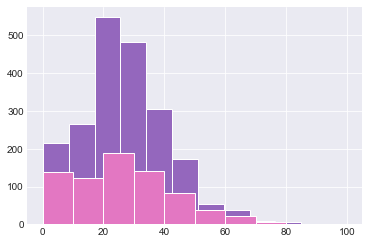

In [92]:
df_1920.groupby('Race').Age.hist()

ValueError: `dataset` input should have multiple elements.

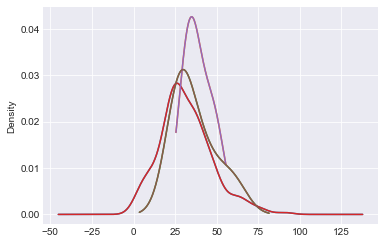

In [93]:
df_1920.groupby('Race').Age.plot(kind='kde')

In [ ]:
bins= [-1,6,13,20,30,40,65,110]
labels = ['unknown','Infant','Teen','Adult 20-30','Adult 30-40','Adult 40-65','Above 65']
df_1900['AgeGroup'] = pd.cut(df_1900['Age'], bins=bins, labels=labels, right=False)
df_1910['AgeGroup'] = pd.cut(df_1910['Age'], bins=bins, labels=labels, right=False)
df_1920['AgeGroup'] = pd.cut(df_1920['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df_1900['AgeGroup']
sns.countplot('AgeGroup',hue='Sex',data=df_1900)
plt.xticks(rotation='45')

In [ ]:
df_1910['AgeGroup']
sns.countplot('AgeGroup',hue='Sex',data=df_1910)
plt.xticks(rotation='45')

In [ ]:
df_1920['AgeGroup']
sns.countplot('AgeGroup',hue='Sex',data=df_1920)
plt.xticks(rotation='45')

In [ ]:
ax = sns.barplot(x='Race', y='Age', hue='Sex', 
                 data=df_1900, palette='Greys')
ax.figure.set_size_inches(16,4)

In [ ]:
ax = sns.barplot(x='Race', y='Age', hue='Sex', 
                 data=df_1910, palette='Greys')
ax.figure.set_size_inches(16,4)

In [ ]:
ax = sns.barplot(x='Race', y='Age', hue='Sex', 
                 data=df_1920, palette='Greys')
ax.figure.set_size_inches(16,4)

In [ ]:
list(df_1920['Occupation'])

In [ ]:
df_1900['Age at last birthday (8)'].unique()

In [ ]:
df_1900_tidy = df_1900.apply(pd.to_numeric, errors='ignore')

In [ ]:
df_1900_tidy['Age at last birthday (8)'].dtypes

In [ ]:
#df.applymap(lambda x: x.replace(',','') if type(x) is str else x)
df_1900_tidy['Age at last birthday (8)'] = df_1900_tidy['Age at last birthday (8)'].str.replace(r'(^.*onth.*$)', '1').fillna(df_1900_tidy['Age at last birthday (8)'])

In [ ]:
df_1900_tidy['Age at last birthday (8)'].unique()

In [ ]:
df_1900_tidy.dtypes

In [ ]:
df_1900_tidy['Age at last birthday (8)'].fillna(0)

In [ ]:
df_1900_tidy['Age at last birthday (8)'].unique()

In [ ]:
df_1900_tidy.dtypes

In [ ]:
df_1900_tidy.replace(np.nan,0)

In [ ]:
df_1900_tidy.head()

In [ ]:
df_1900_tidy['Age at last birthday (8)'].unique()

In [ ]:
df_1900_tidy['Age at last birthday (8)'] = df_1900_tidy['Age at last birthday (8)'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_1900_tidy['Age at last birthday (8)'].unique()

In [ ]:
df_1900_tidy['Own or Rent (25)'].unique()


In [ ]:
df_1900_tidy['Own or Rent (25)'] = df_1900_tidy['Own or Rent (25)'].str.replace(r'(^.*?.*$)', 'nan').fillna(df_1900_tidy['Own or Rent (25)'])

In [ ]:
df_1900_tidy['Own or Rent (25)'].unique

In [ ]:
sns.countplot("Own or Rent (25)",hue='Color or Race (5)',data=df_1900_tidy)

In [ ]:
agg_1900 = df_1900.groupby(['Color or Race (5)'])['Sex (6)'].count().astype(int)
agg_1900

In [ ]:
sns.countplot("Color or Race (5)",hue='Sex (6)',data=df_1900)

In [ ]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(df_1900_tidy['Color or Race (5)'], df_1900_tidy['Age at last birthday (8)'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

In [ ]:
df_1900.shape

In [ ]:
df_1900.count()

In [ ]:
df_1900["Color or Race (5)"].value_counts()

In [ ]:
df_1910["Color or Race (5)"].value_counts()

In [ ]:
df_1920["Color or Race (5)"].value_counts()

In [ ]:
occ_count  = df_1900['Occupation (19)'].value_counts()
occ_count = occ_count[20:,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.8)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1900 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()


In [ ]:
occ_count  = df_1910['Occupation (19)'].value_counts()
occ_count = occ_count[1:30,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.6)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1910 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()

In [ ]:
occ_count  = df_1920['Occupation (19)'].value_counts()
occ_count = occ_count[1:10,]
ax = sns.barplot(occ_count.index, occ_count.values, alpha=0.8)
ax.figure.set_size_inches(15, 5)
plt.title('Top 10 Occupations in 1920 Census')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation='45')
plt.show()

In [ ]:
avg_age = df_1900_tidy.groupby('Color or Race (5)', sort=True)['Age at last birthday (8)'].mean()
ax = avg_age.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
#ax.set_xlim(-.5, 5.5)
#ax.set_ylabel('Mean Salary')

In [ ]:
df_1900_tidy.groupby(['Color or Race (5)', 'Sex (6)'], sort=False)['Age at last birthday (8)'] \
        .mean().unstack('Sex (6)') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

In [ ]:
ax = sns.boxplot(x='Sex (6)', y='Age at last birthday (8)', data=df_1900_tidy, hue='Color or Race (5)', palette='Greys')
ax.figure.set_size_inches(14,4)

In [ ]:
df_1900_tidy['Own or Rent (25)'].unique()

In [ ]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))